# 数据变换

我们获取到的初始数据或许结构上并不令人满意，这时候我们需要进行一些基本的数据变换来得到我们想要的数据。

[数据来源](https://www.kaggle.com/rohan8594/finance-data-project)

各个银行股票数据，时间从2006年1月1号到2016年1月1号：

- 美国银行：Bank of America   
- 花旗银行：CitiGroup    
- 高盛集团：Goldman Sachs    
- 摩根大通：JPMorgan Chase   
- 摩根士丹利：Morgan Stanley   
- 美国富国银行：Wells Fargo  

In [8]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
bank_stocks = pd.read_pickle('data/all_banks')
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']  #将表头放入列表
bank_stocks.head(4)

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  

[4 rows x 30 columns]

## 1. 查看index

csv文件，日期是以字符串保存，当读取成为dataframe后，里面的时间将转变类型datetime，务必保证这一步正常进行，如果类型没有转换成功，需要用pd.to_datetime来使之转换。

In [9]:
# bank_stocks.index = pd.to_datetime(bank_stocks.index)
print(bank_stocks.index)
type(bank_stocks.index)

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='Date', length=2517, freq=None)


pandas.core.indexes.datetimes.DatetimeIndex

## 2.  批量生成收益率

收益率：Pt当日收盘价,Pt-1前一日收盘价

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

注：第一天收益率无法计算，为空

In [10]:
returns = pd.DataFrame()
for x in tickers:
    returns[x + ' Return'] = bank_stocks.xs('Close',axis=1,level=1)[x].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


## 3. 移动平均数

有时候我们关心的不是某天的数据，而是某一时间段的数据，比如近三十天的平均值，这时候可以用到pandas的窗口函数rolling，他可以截取一个时间窗进行操作，并将这个操作应用到整个dataframe。

下面对Bank of America的收盘数据进行变换，用每三十天的平均数据生成一个新的数据来绘图。

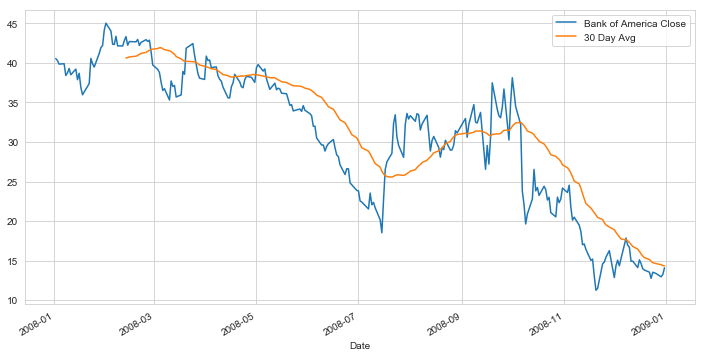

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Optional Plotly Method Imports
from plotly import __version__

# 原始图像
origin=bank_stocks.loc['2008-01-01':'2008-12-31'].xs('Close',axis=1,level=1)['BAC']
origin.plot(figsize=(12,6),label='Bank of America Close')
# 近30天平均值
rolling_avg = pd.DataFrame()
rolling_avg['30 Day Avg'] = origin.rolling(window=30).mean()
rolling_avg['30 Day Avg'].plot(figsize=(12,6),label='30 Day Avg')
plt.legend()